# NOTEBOOK INDEX 

1. Data Loading and Variable checks
2. Missing data Analysis 
3. Exploratory Data Analysis
    - Gender vs Churn
    - Contract vs Churn
    - MultipleLines vs Churn
    - Churn vs non Churn
    - Checking the distribution
    - PaymentMethod vs Churn
    - Internet Service vs Churn
    - Tenure type vs Churn
    - Monthly Charge type vs Churn
    - Histogram comparison
4. Correlation Matrix
5. Basic Factor Analysis

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt #visualize 
import plotly  # visualize 
import plotly.plotly as py # visualize 
import plotly.graph_objs as go #visualize 
from plotly import tools #visualize
import seaborn as sns
import numpy as np
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

## Data Loading & Variable checks

In [15]:
print(f'Total Data : {data.shape[0]}')
print(f'Total Variables : {data.shape[1]}')
print(f'Missing Values : {data.isnull().sum().values.sum()}\n')
print('Lets look at variables and what values we have :\n')
print(data.nunique())

Total Data : 7043
Total Variables : 21
Missing Values : 0

Lets look at variables and what values we have :

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64


In [15]:
data.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Exploratory Data Analysis

Analysing the data and ploting it for various key variables.

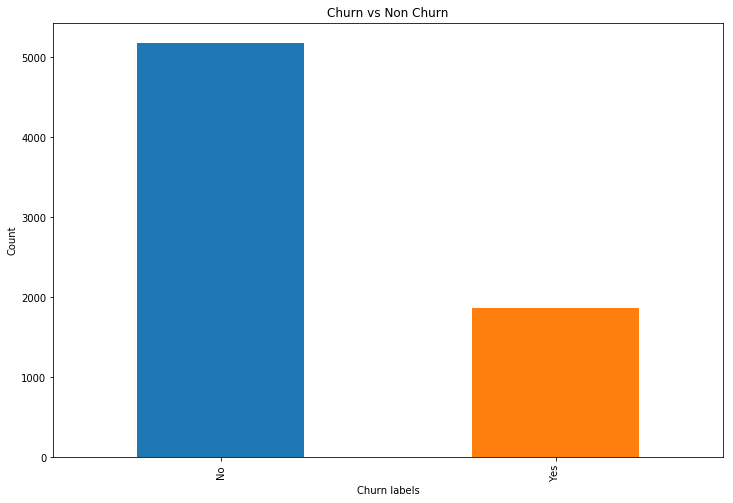

In [84]:
fig,ax = plt.subplots(nrows=1,ncols=1,figsize=(12,8))
data['Churn'].value_counts().plot(kind='Bar')
plt.title('Churn vs Non Churn')
plt.xlabel('Churn labels')
plt.ylabel('Count')
plt.show()

In [34]:
# ploting Gender vs Churn
trace1 = go.Bar(x=data['gender'].groupby(data.Churn).get_group('No').value_counts().keys().tolist(),
                y=data['gender'].groupby(data.Churn).get_group('No').value_counts().values.tolist(),
                name='No',marker=dict(color='rgb(58,200,225)'))
trace2 = go.Bar(x=data['gender'].groupby(data.Churn).get_group('Yes').value_counts().keys().tolist(),
                y=data['gender'].groupby(data.Churn).get_group('Yes').value_counts().values.tolist(),
                name='Yes',marker=dict(color='rgba(222,45,38,0.8)'))

graph = [trace1,trace2]
layout = go.Layout(barmode='stack',title='Gender Vs Churn')
fig = go.Figure(data=graph,layout=layout)
py.iplot(fig,filename='stacked-bar')

/Users/davidjoy/.conda/envs/SurvivalAnalysis/lib/python3.6/site-packages/IPython/core/display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



In [29]:
# ploting Contract vs Churn
trace1 = go.Bar(x=data['Contract'].groupby(data.Churn).get_group('No').value_counts().keys().tolist(),
                y=data['Contract'].groupby(data.Churn).get_group('No').value_counts().values.tolist(),
                name='No',marker=dict(color='rgb(58,200,225)'))
trace2 = go.Bar(x=data['Contract'].groupby(data.Churn).get_group('Yes').value_counts().keys().tolist(),
                y=data['Contract'].groupby(data.Churn).get_group('Yes').value_counts().values.tolist(),
                name='Yes',marker=dict(color='rgba(222,45,38,0.8)'))

graph = [trace1,trace2]
layout = go.Layout(barmode='stack',title='Contract Type Vs Churn')
fig = go.Figure(data=graph,layout=layout)
py.iplot(fig,filename='stacked-bar')

In [35]:
# ploting MultipleLines vs Churn
trace1 = go.Bar(x=data['MultipleLines'].groupby(data.Churn).get_group('No').value_counts().keys().tolist(),
                y=data['MultipleLines'].groupby(data.Churn).get_group('No').value_counts().values.tolist(),
                name='No',marker=dict(color='rgb(58,200,225)'))
trace2 = go.Bar(x=data['MultipleLines'].groupby(data.Churn).get_group('Yes').value_counts().keys().tolist(),
                y=data['MultipleLines'].groupby(data.Churn).get_group('Yes').value_counts().values.tolist(),
                name='Yes',marker=dict(color='rgba(222,45,38,0.8)'))

graph = [trace1,trace2]
layout = go.Layout(barmode='stack',title='MultipleLines Vs Churn')
fig = go.Figure(data=graph,layout=layout)
py.iplot(fig,filename='stacked-bar')

In [71]:
# Checking the distribution
tenure = go.Histogram(x=data['tenure'],marker=dict(color='#DB4437'))
total_charges = go.Histogram(x=data.TotalCharges)
montly_charges = go.Histogram(x=data.MonthlyCharges)
fig = tools.make_subplots(rows=2, cols=2)
fig.append_trace(tenure, 1, 1)
fig.append_trace(total_charges, 1, 2)
fig.append_trace(montly_charges, 2, 1)
py.iplot(fig)

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]
[ (2,1) x3,y3 ]  [ (2,2) x4,y4 ]



In [72]:
# ploting PaymentMethod vs Churn
trace1 = go.Bar(x=data['PaymentMethod'].groupby(data.Churn).get_group('No').value_counts().keys().tolist(),
                y=data['PaymentMethod'].groupby(data.Churn).get_group('No').value_counts().values.tolist(),
                name='No',marker=dict(color='rgb(58,200,225)'))
trace2 = go.Bar(x=data['PaymentMethod'].groupby(data.Churn).get_group('Yes').value_counts().keys().tolist(),
                y=data['PaymentMethod'].groupby(data.Churn).get_group('Yes').value_counts().values.tolist(),
                name='Yes',marker=dict(color='rgba(222,45,38,0.8)'))

graph = [trace1,trace2]
layout = go.Layout(barmode='stack',title='PaymentMethod Vs Churn')
fig = go.Figure(data=graph,layout=layout)
py.iplot(fig,filename='stacked-bar')

In [75]:
# ploting Internet Service vs Churn
trace1 = go.Bar(x=data['InternetService'].groupby(data.Churn).get_group('No').value_counts().keys().tolist(),
                y=data['InternetService'].groupby(data.Churn).get_group('No').value_counts().values.tolist(),
                name='No',marker=dict(color='rgb(58,200,225)'))
trace2 = go.Bar(x=data['InternetService'].groupby(data.Churn).get_group('Yes').value_counts().keys().tolist(),
                y=data['InternetService'].groupby(data.Churn).get_group('Yes').value_counts().values.tolist(),
                name='Yes',marker=dict(color='rgba(222,45,38,0.8)'))

graph = [trace1,trace2]
layout = go.Layout(barmode='stack',title='Internet Service Vs Churn')
fig = go.Figure(data=graph,layout=layout)
py.iplot(fig,filename='stacked-bar')

In [106]:
# creating a new categorical values for Tenure
def func(x):
    if x <= 6 :
        return "Tenure_0-6"
    elif (x > 6) & (x <=12) :
        return "Tenure_6-12"
    elif (x > 12) & (x <= 24 ):
        return "Tenure_12-24"
    elif (x > 24) & (x <= 48) :
        return "Tenure_24-48"
    elif (x > 48) & (x <= 60) :
        return "Tenure_48-60"
    elif x > 60 :
        return "Tenure_gt_60"

data['tenure_label'] = data.tenure.apply(func)

In [108]:
# ploting Tenure type vs Churn
trace1 = go.Bar(x=data['tenure_label'].groupby(data.Churn).get_group('No').value_counts().keys().tolist(),
                y=data['tenure_label'].groupby(data.Churn).get_group('No').value_counts().values.tolist(),
                name='No',marker=dict(color='rgb(58,200,225)'))
trace2 = go.Bar(x=data['tenure_label'].groupby(data.Churn).get_group('Yes').value_counts().keys().tolist(),
                y=data['tenure_label'].groupby(data.Churn).get_group('Yes').value_counts().values.tolist(),
                name='Yes',marker=dict(color='rgba(222,45,38,0.8)'))

graph = [trace1,trace2]
layout = go.Layout(barmode='stack',title='Tenure Type Vs Churn')
fig = go.Figure(data=graph,layout=layout)
py.iplot(fig,filename='stacked-bar')

#### Clearly churn in the first 6 months is maximum, which is approx the same as rest of the churn.

In [109]:
# creating a new categorical values for Tenure
def func(x):
    if x <= 40 :
        return "Monthly_0-40"
    elif (x > 40) & (x <=80) :
        return "Monthly_40-80"
    elif (x > 80) & (x <= 100 ):
        return "Monthly_80-100"
    elif x>100 :
        return "Monthly_gt_100"

data['Montly_Charge_label'] = data.MonthlyCharges.apply(func)

In [110]:
# ploting Monthly Charge type vs Churn
trace1 = go.Bar(x=data['Montly_Charge_label'].groupby(data.Churn).get_group('No').value_counts().keys().tolist(),
                y=data['Montly_Charge_label'].groupby(data.Churn).get_group('No').value_counts().values.tolist(),
                name='No',marker=dict(color='rgb(58,200,225)'))
trace2 = go.Bar(x=data['Montly_Charge_label'].groupby(data.Churn).get_group('Yes').value_counts().keys().tolist(),
                y=data['Montly_Charge_label'].groupby(data.Churn).get_group('Yes').value_counts().values.tolist(),
                name='Yes',marker=dict(color='rgba(222,45,38,0.8)'))

graph = [trace1,trace2]
layout = go.Layout(barmode='stack',title='Monthly Charge Type Vs Churn')
fig = go.Figure(data=graph,layout=layout)
py.iplot(fig,filename='stacked-bar')

In [112]:
churned_data = data[data['Churn']=='Yes']
non_churned_data = data[data['Churn']=='No']

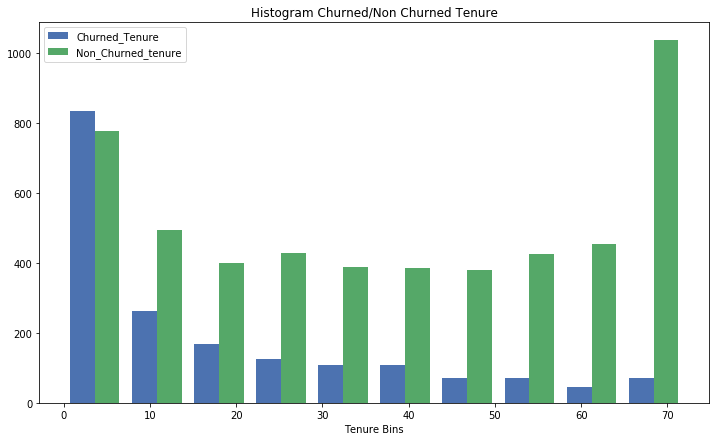

In [157]:
plt.style.use('seaborn-deep')
fig, axes = plt.subplots(nrows=1, ncols=1,figsize=(12,7))
plt.hist([churned_data['tenure'],non_churned_data['tenure']],label=['Churned_Tenure', 'Non_Churned_tenure'])
plt.legend(loc='upper left')
plt.xlabel('Tenure Bins')
plt.title('Histogram Churned/Non Churned Tenure')
plt.show()

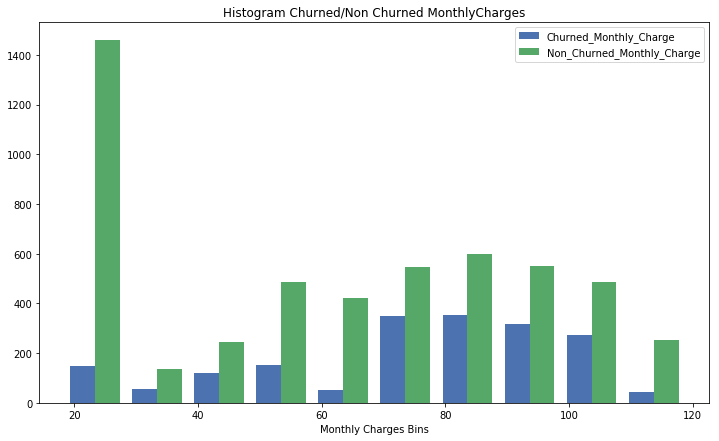

In [163]:
fig, axes = plt.subplots(nrows=1, ncols=1,figsize=(12,7))
plt.hist([churned_data['MonthlyCharges'],non_churned_data['MonthlyCharges']],label=['Churned_Monthly_Charge', 'Non_Churned_Monthly_Charge'])
plt.legend(loc='upper right')
plt.xlabel('Monthly Charges Bins')
plt.title('Histogram Churned/Non Churned MonthlyCharges')
plt.show()

In [26]:
new_data = data.drop(['customerID','PaymentMethod','OnlineSecurity','OnlineBackup','TotalCharges','MonthlyCharges','tenure'],axis=1)
new_data = pd.get_dummies(new_data,drop_first=True)
new_data.head(5)

,SeniorCitizen,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,DeviceProtection_No internet service,...,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,Churn_Yes
0,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
3,0,1,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
4,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,1


In [53]:
data1 = data[['tenure','MonthlyCharges']]
nd = pd.concat([new_data,data1],axis=1)
nd.head(5)

,SeniorCitizen,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,DeviceProtection_No internet service,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,Churn_Yes,tenure,MonthlyCharges
0,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,1,29.85
1,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,34,56.95
2,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,1,2,53.85
3,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,45,42.30
4,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,1,1,2,70.70


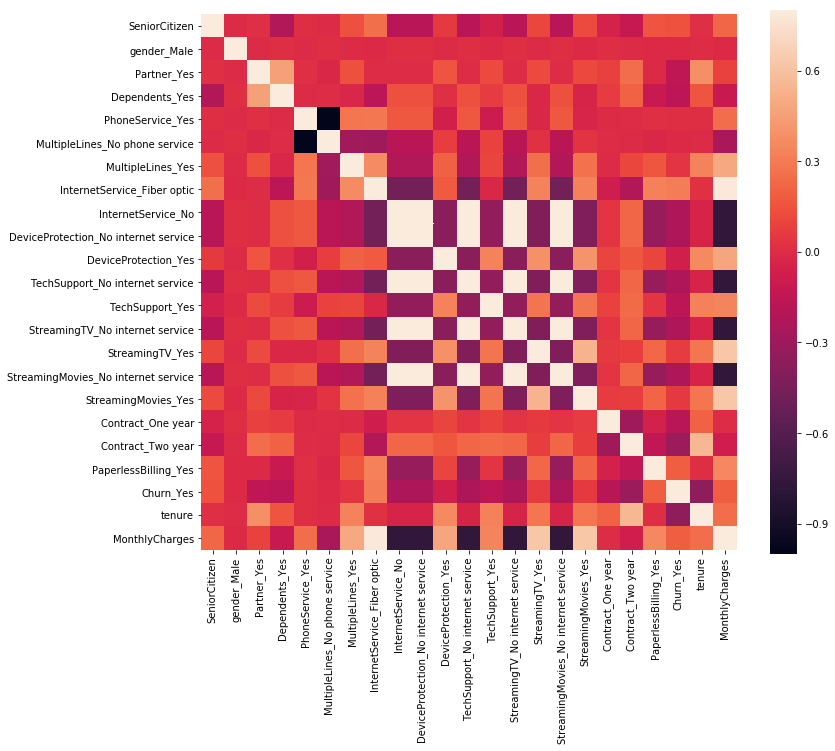

In [54]:
corrmat = nd.corr()
f, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(corrmat,vmax=.8,square='True')

In [71]:
X = nd.values
from sklearn.decomposition import FactorAnalysis
factor = FactorAnalysis(n_components=4, random_state=0).fit(X)
pd.DataFrame(factor.components_,columns=nd.columns).transpose()

,0,1,2,3
SeniorCitizen,-0.066645,-0.017884,1.830453e-02,-4.613413e-02
gender_Male,0.002845,0.003946,-1.004431e-04,9.066600e-03
Partner_Yes,0.000693,-0.008907,1.837982e-01,4.951116e-02
Dependents_Yes,0.063465,0.014774,6.267151e-02,5.377819e-02
PhoneService_Yes,0.063480,-0.288838,-3.012276e-10,3.112099e-10
MultipleLines_No phone service,-0.063480,0.288838,3.012276e-10,-3.112098e-10
MultipleLines_Yes,-0.097039,-0.162749,1.947086e-01,-8.821902e-02
InternetService_Fiber optic,-0.222905,-0.196362,9.154287e-02,-2.875800e-01
InternetService_No,0.411590,0.017819,1.863923e-10,-1.894105e-10
DeviceProtection_No internet service,0.411590,0.017819,1.863923e-10,-1.894105e-10
